# Intrusion detection in IDS using Network Traffic Classification based on Single Flow Time Series Analysis 

Problem: binary detection of Intrusion in IDS system

Raw data from: UNSW-NB15 [1]

-----------------------------------------------------------------------
[1] Nour Moustafa and Jill Slay. Unsw-nb15: a comprehensive data set for network intrusion detection systems (unsw-nb15 network data set). In 2015 military communications and information systems conference (MilCIS), pages 1–6. IEEE, 2015.

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import catboost as cb

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../cnsm_final_datasets/ids_unsw_nb_15_binary.csv")

In [3]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,149.171.126.18,175.45.176.1,10,0,40,0,1.424220e+09,1.424220e+09,179,...,-316303.733903,0.025341,0.465500,0.329833,NaN,-142.570453,382.427060,-0.000199,0.028264,False
1,1,175.45.176.1,149.171.126.18,6,0,0,0,1.424220e+09,1.424220e+09,26581,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False
2,2,149.171.126.12,175.45.176.2,12,0,746,0,1.424220e+09,1.424220e+09,445,...,6629.691442,0.857953,0.531418,0.291302,0.079684,1.335840,0.163986,0.993135,0.257254,True
3,3,175.45.176.2,149.171.126.12,8,0,370,0,1.424220e+09,1.424220e+09,1540,...,4637.314944,0.568099,0.520225,0.288753,0.051809,1.165001,0.163854,0.993135,0.361351,True
4,4,149.171.126.12,175.45.176.2,12,0,588,0,1.424220e+09,1.424220e+09,445,...,2903.826062,0.679153,0.541261,0.288383,0.116073,1.248354,0.371784,0.911681,0.080400,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979454,2979454,149.171.126.15,175.45.176.2,4,4,2360,584,1.421934e+09,1.421934e+09,2049,...,-320173.252379,0.014216,0.425575,0.384493,NaN,-316.101688,196.224287,-0.000199,0.054011,False
2979455,2979455,149.171.126.11,175.45.176.2,112,0,5600,0,1.421934e+09,1.421934e+09,137,...,103147.938616,0.006667,0.009826,0.007384,-2.461098,428.683046,457032.737889,-0.599179,0.000002,True
2979456,2979456,149.171.126.11,175.45.176.2,112,0,5600,0,1.421934e+09,1.421934e+09,137,...,103147.938616,0.006667,0.009826,0.007384,-2.461098,428.683046,457032.737889,-0.599179,0.000002,True
2979457,2979457,149.171.126.11,175.45.176.2,112,0,5600,0,1.421934e+09,1.421934e+09,137,...,103147.938616,0.006667,0.009826,0.007384,-2.461098,428.683046,457032.737889,-0.599179,0.000002,True


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)

# df['LABEL'] = df.LABEL.astype('category')
bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


for F in features:
    if F in bool_features:
        continue
    if F in distribution_features:
        df.replace([np.inf], 0.5, inplace=True)
        df.replace([-np.inf], 0.5, inplace=True)
        df.loc[df[F].isnull(), F] = 0.5
    elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
        df.replace([np.inf], 0.5, inplace=True)
        df.replace([-np.inf], 0.5, inplace=True)
        df.loc[df[F].isnull(), F] = 0.5
    # elif F in frequency_features: 
    #     df.replace([np.inf], -1, inplace=True)
    #     df.replace([-np.inf], -1, inplace=True)
    #     df.loc[df[F].isnull(), F] = -1
    # else:
    #     df.replace([np.inf], 0, inplace=True)
    #     df.replace([-np.inf], 0, inplace=True)
    #     df.loc[df[F].isnull(), F] = 0


for F in bool_features:
    df.loc[df[F].isnull(), F] = False
    df[F] = df[F].astype('bool')

In [6]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,149.171.126.18,175.45.176.1,10,0,40,0,1.424220e+09,1.424220e+09,179,26581,64,60.0,8.426150,71,-0.767317,60.0,60.00,60,80,20,60,13.165859,6,9.375000,64.498062,0.800000,0.200000,0.474713,15.665518,-0.962798,1.855764e-19,2.200665e-19,0.000000,2.640746,0.721928,0.217322,0.520925,False,0.477121,0.0,0.0,0.581329,0.812500,0.105863,0.110606,0.085446,0.151154,0.182105,0.020234,0.000009,9.536743e-07,0.085438,0.236825,False,0.444444,False,0.0,0.0,640,1.0,False,0,0.000000,-163.305301,28.052888,0.025540,0.025341,-0.196765,2.391191,-0.13590,-9.838254e+02,NaN,2.167659e+07,-316303.733903,0.025341,0.465500,0.329833,NaN,-142.570453,382.427060,-0.000199,True,False
1,1,175.45.176.1,149.171.126.18,6,0,0,0,1.424220e+09,1.424220e+09,26581,179,60,60.0,0.000000,0,-1.000000,60.0,60.00,60,60,0,60,0.000000,0,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,False,0.301030,0.0,0.0,0.536769,0.875000,0.084505,0.096086,0.000007,0.157423,0.157432,0.031486,0.000009,5.960464e-06,0.096073,0.327734,False,0.000000,False,0.0,0.0,360,1.0,True,60,0.000007,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,False,False
2,2,149.171.126.12,175.45.176.2,12,0,746,0,1.424220e+09,1.424220e+09,445,1540,122,60.0,96.555683,9323,-0.116420,60.0,197.00,60,296,236,60,79.144003,82,67.213115,153.201936,0.666667,0.333333,0.642117,3.169156,0.569383,1.851464e-07,2.127170e-07,0.094891,1.931664,1.251629,0.349133,0.638009,False,0.592635,0.0,0.0,0.593576,0.750000,0.427693,0.551941,0.267584,0.666187,0.720536,0.065503,0.000011,9.536743e-07,0.267580,0.244799,False,0.545455,False,0.0,0.0,1466,1.0,False,0,0.000000,0.330470,0.494456,0.006667,0.999801,0.370146,0.040775,0.33047,1.850730e+03,2.638120e+03,1.884500e+04,6629.691442,0.857953,0.531418,0.291302,0.079684,1.335840,0.163986,0.993135,True,True
3,3,175.45.176.2,149.171.126.12,8,0,370,0,1.424220e+09,1.424220e+09,1540,445,106,60.0,85.632938,7334,-0.106282,60.0,106.25,60,245,185,60,80.785790,69,65.094340,133.064834,0.750000,0.250000,0.537176,3.012859,0.502625,3.981232e-07,4.965469e-07,-0.989189,1.797994,0.811278,0.270426,0.463169,False,0.477121,0.0,0.0,0.560795,0.791667,0.385295,0.528398,0.325725,0.687046,0.687051,0.098150,0.000007,2.145767e-06,0.325723,0.301330,False,0.571429,False,0.0,0.0,850,1.0,False,0,0.000000,0.605359,0.769212,0.006667,0.999801,0.660268,0.041418,0.60536,3.301338e+03,1.967891e+03,1.400714e+04,4637.314944,0.568099,0.520225,0.288753,0.051809,1.165001,0.163854,0.993135,True,True
4,4,149.171.126.12,175.45.176.2,12,0,588,0,1.424220e+09,1.424220e+09,445,1793,109,60.0,72.622311,5274,-0.200293,60.0,197.00,60,217,157,60,66.625973,65,59.633028,129.291660,0.666667,0.333333,0.674724,3.676556,0.265408,4.637886e-21,5.328525e-21,0.284672,1.312703,1.251629,0.349133,0.668388,False,0.592635,0.0,0.0,0.52

In [7]:
print(f"botnet: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")

botnet: 98764	clear: 2880695


In [8]:
df = df[["LABEL"] + features].copy()

In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [10]:
df.shape

(864799, 77)

In [11]:
print(f"botnet: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")
# print(f"botnet: {len(df[df['LABEL_code'] == 1])}\tclear: {len(df[df['LABEL_code'] == 0])}")

botnet: 73944	clear: 790855


In [17]:
X = df[features]
y = df['LABEL']
sm = SMOTE(sampling_strategy="not majority")
X, y = sm.fit_resample(X, y)
X['LABEL'] = y
df = X

In [18]:
df_validation = df.sample(n=250000)
df_features =  df[~df.isin(df_validation)].dropna()

In [19]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [20]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), 
                        gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 20, 100, 20),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,90,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 100, 600, 100),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [21]:
best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(200000), features, verbose=False)

100%|██████████| 100/100 [1:50:20<00:00, 66.21s/trial, best loss: -0.9829568890135453]  
The best hyperparameters are :  

{'colsample_bytree': 0.2586930934740388, 'gamma': 4.097207938758439, 'max_depth': 40.0, 'min_child_weight': 6.0, 'n_estimators': 400.0, 'reg_alpha': 2.0, 'reg_lambda': 0.6790421773925466}


In [22]:
def while_XGBoost_classification_tunned(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL']  # Labels
    best_results = (0,"",None,None, None)
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            
        model = XGBClassifier(
                n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                colsample_bytree=int(best_hyperparams['colsample_bytree']),
                # subsample=int(best_hyperparams['subsample']),
                # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
        precision = precision_score(y_test, y_pred)  * 100
        recall = recall_score(y_test, y_pred)  * 100
        F1 = f1_score(y_test, y_pred)  * 100
        if best_results[0] < F1:
            matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
            best_results = (F1,  "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1), matrix, percentage_matrix, model)
    print("")
    print("")
    print("")
    print(best_results[0])
    print(best_results[1])
    plot_confusion_matrix(best_results[2], best_results[3], model="XGBoost")
    return best_results[4]

9


98.5082968037783
98.50 & 98.14 & 98.88 & 98.51 \\


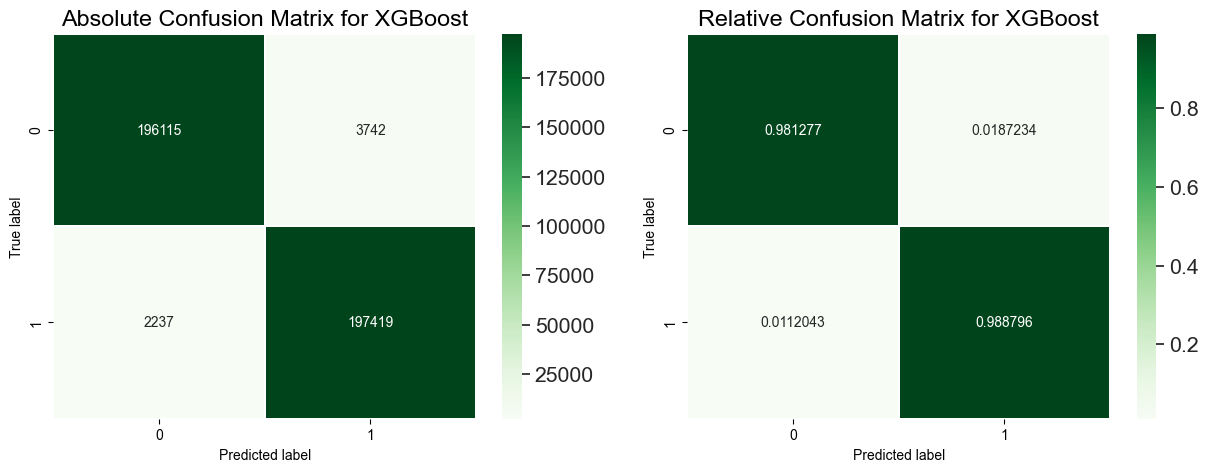

In [23]:
best_model = while_XGBoost_classification_tunned(best_hyperparams, cycles=10)

# Validation

98.50 & 98.16 & 98.86 & 98.51 \\


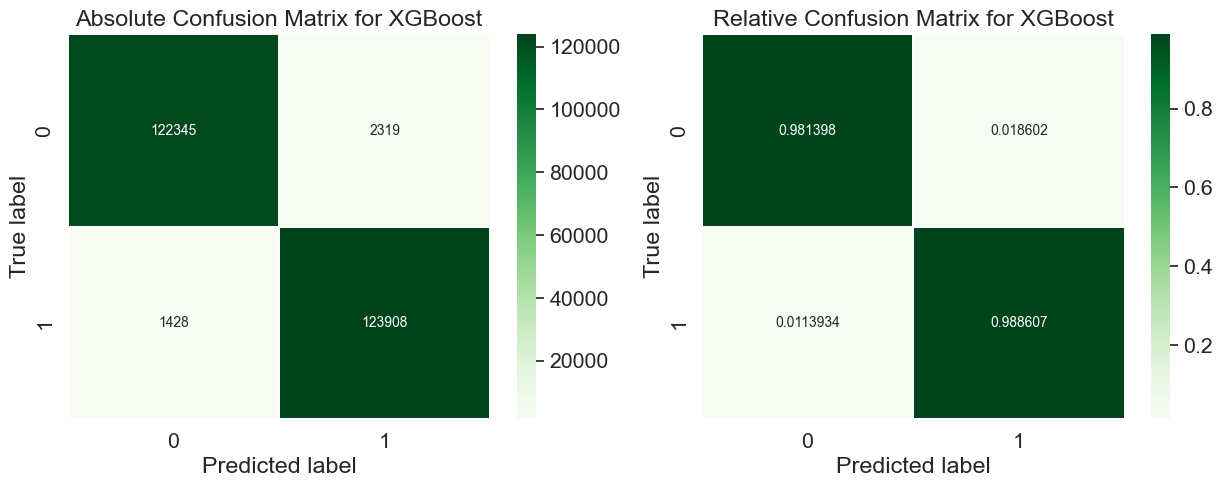

In [24]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL']  # Labels

y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100

print("{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1))
matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

In [25]:
import csv

problem = "IDS_UNSW-binary"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    writer.writerow([problem, "-", accuracy, precision, recall, F1, 0, 0, 0])

# Feature importance

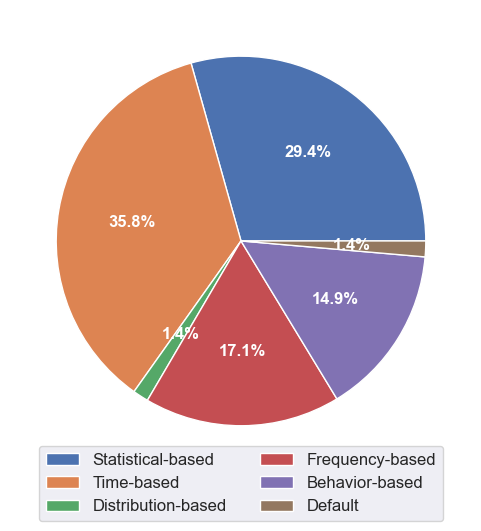

In [26]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()
f_df = feat_importances[default_faetures].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf, f_df]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based",  "Default"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [27]:
data

[0.19595072, 0.2390195, 0.009192086, 0.114366814, 0.09969402, 0.009192086]

In [28]:
feat_importances

PERIODICITY_SCDF            0.000000
PERIODICITY                 0.000000
CNT_ZEROS                   0.000000
AREA_VALUES_DISTRIBUTION    0.000000
PEARSON_SK1_SKEWNESS        0.000343
                              ...   
POWER_MODE                  0.052095
TRANSIENTS                  0.066955
MIN_DIFFTIMES               0.069143
MEAN_DIFFTIMES              0.116936
CNT_DISTRIBUTION            0.315298
Length: 76, dtype: float32

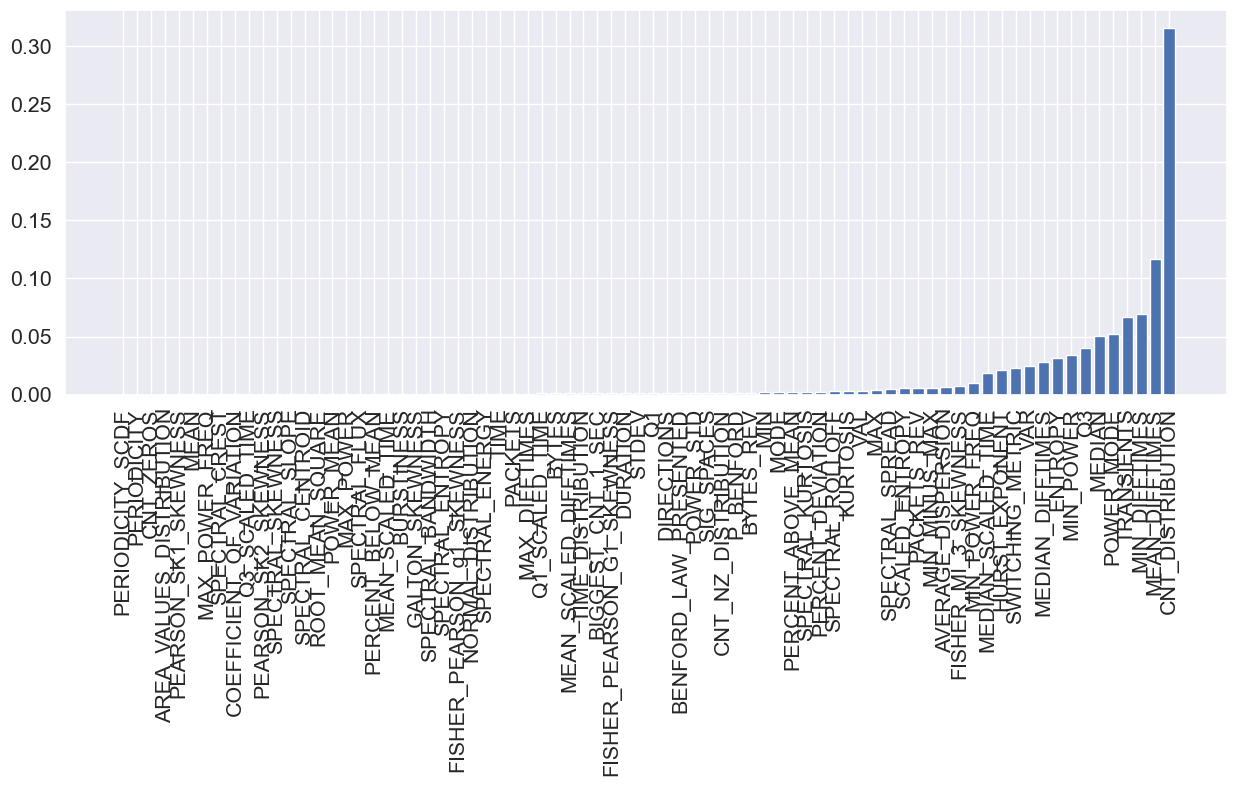

In [29]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [30]:
feat_importances.keys()

Index(['PERIODICITY_SCDF', 'PERIODICITY', 'CNT_ZEROS',
       'AREA_VALUES_DISTRIBUTION', 'PEARSON_SK1_SKEWNESS', 'MEAN',
       'MAX_POWER_FREQ', 'SPECTRAL_CREST', 'COEFFICIENT_OF_VARIATION',
       'Q3_SCALED_TIME', 'PEARSON_SK2_SKEWNESS', 'SPECTRAL_SKEWNESS',
       'SPECTRAL_SLOPE', 'SPECTRAL_CENTROID', 'ROOT_MEAN_SQUARE', 'POWER_MEAN',
       'MAX_POWER', 'SPECTRAL_FLUX', 'PERCENT_BELOW_MEAN', 'MEAN_SCALED_TIME',
       'BURSTINESS', 'GALTON_SKEWNESS', 'SPECTRAL_BANDWIDTH',
       'SPECTRAL_ENTROPY', 'FISHER_PEARSON_g1_SKEWNESS', 'NORMAL_DISTRIBUTION',
       'SPECTRAL_ENERGY', 'TIME', 'PACKETS', 'MAX_DIFFTIMES', 'Q1_SCALED_TIME',
       'BYTES', 'MEAN_SCALED_DIFFTIMES', 'TIME_DISTRIBUTION',
       'BIGGEST_CNT_1_SEC', 'FISHER_PEARSON_G1_SKEWNESS', 'DURATION', 'STDEV',
       'Q1', 'DIRECTIONS', 'BENFORD_LAW_PRESENTED', 'POWER_STD', 'SIG_SPACES',
       'CNT_NZ_DISTRIBUTION', 'P_BENFORD', 'BYTES_REV', 'MIN', 'MODE',
       'PERCENT_ABOVE_MEAN', 'SPECTRAL_KURTOSIS', 'PERCENT_DEVIAT

In [31]:
feat_importances.to_dict()

{'PERIODICITY_SCDF': 0.0,
 'PERIODICITY': 0.0,
 'CNT_ZEROS': 0.0,
 'AREA_VALUES_DISTRIBUTION': 0.0,
 'PEARSON_SK1_SKEWNESS': 0.0003426095936447382,
 'MEAN': 0.000350017158780247,
 'MAX_POWER_FREQ': 0.00040926257497631013,
 'SPECTRAL_CREST': 0.0004587827133946121,
 'COEFFICIENT_OF_VARIATION': 0.00046714115887880325,
 'Q3_SCALED_TIME': 0.0004898212500847876,
 'PEARSON_SK2_SKEWNESS': 0.0005061243427917361,
 'SPECTRAL_SKEWNESS': 0.0005208553629927337,
 'SPECTRAL_SLOPE': 0.0005210680537857115,
 'SPECTRAL_CENTROID': 0.0005447583389468491,
 'ROOT_MEAN_SQUARE': 0.0005785102257505059,
 'POWER_MEAN': 0.0006212952430360019,
 'MAX_POWER': 0.0006316439830698073,
 'SPECTRAL_FLUX': 0.0006324296118691564,
 'PERCENT_BELOW_MEAN': 0.000657297729048878,
 'MEAN_SCALED_TIME': 0.0006650415016338229,
 'BURSTINESS': 0.0007016162271611392,
 'GALTON_SKEWNESS': 0.0007173424819484353,
 'SPECTRAL_BANDWIDTH': 0.0007352747488766909,
 'SPECTRAL_ENTROPY': 0.0007369748782366514,
 'FISHER_PEARSON_g1_SKEWNESS': 0.00074892

# Feature selection

In [32]:
def perform_val(selected_features, best_hyperparams=None, cycles=10):
    if best_hyperparams is None:
        best_hyperparams = tunne_together_XGBoost_classification(df_features.sample(200000), selected_features, verbose=False)
    
    X=df_features[selected_features]  # Features
    y=df_features['LABEL']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test   
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
        )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
        precision = precision_score(y_test, y_pred)  * 100
        recall = recall_score(y_test, y_pred)  * 100
        F1 = f1_score(y_test, y_pred)  * 100
        if F1 > best:   
            best = F1
            best_model = model
            
    
    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL']  # Labels

    y_pred = best_model.predict(X_validation)
    accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
    precision = precision_score(y_validation, y_pred)  * 100
    recall = recall_score(y_validation, y_pred)  * 100
    F1 = f1_score(y_validation, y_pred)  * 100
    
    return accuracy,precision,recall,F1

In [33]:
import FEATURE_REDUCTED as FR
REPORTS = []

report = perform_val(FR.botnet_best_features)
REPORTS.append(report)
report = perform_val(FR.doh_best_features)
REPORTS.append(report)
report = perform_val(FR.dos_best_features)
REPORTS.append(report)
report = perform_val(FR.dns_malware_features)
REPORTS.append(report)
report = perform_val(FR.tor_features)
REPORTS.append(report)
report = perform_val(FR.vpn_features)
REPORTS.append(report)
report = perform_val(FR.all_best_features)
REPORTS.append(report)
report = perform_val(FR.combo_features)
REPORTS.append(report)
report = perform_val(FR.combo_2_features)
REPORTS.append(report)
report = perform_val(FR.crypto_features)
REPORTS.append(report)

100%|██████████| 100/100 [16:33<00:00,  9.94s/trial, best loss: -0.978735981346776]
The best hyperparameters are :  

{'colsample_bytree': 0.7693204063786697, 'gamma': 2.280755463613442, 'max_depth': 60.0, 'min_child_weight': 9.0, 'n_estimators': 300.0, 'reg_alpha': 2.0, 'reg_lambda': 0.45547605414451126}
100%|██████████| 100/100 [08:02<00:00,  4.82s/trial, best loss: -0.9804729340034605]
The best hyperparameters are :  

{'colsample_bytree': 0.3652871242968445, 'gamma': 6.2289550302145855, 'max_depth': 60.0, 'min_child_weight': 3.0, 'n_estimators': 300.0, 'reg_alpha': 0.0, 'reg_lambda': 0.37120129508198746}
100%|██████████| 100/100 [12:40<00:00,  7.61s/trial, best loss: -0.9787966179458608]
The best hyperparameters are :  

{'colsample_bytree': 0.13043740318518973, 'gamma': 2.004233301799533, 'max_depth': 60.0, 'min_child_weight': 10.0, 'n_estimators': 300.0, 'reg_alpha': 7.0, 'reg_lambda': 0.14653056041090268}
100%|██████████| 100/100 [02:35<00:00,  1.56s/trial, best loss: -0.9753368

In [34]:
import csv

problem = "IDS_UNSW-binary"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FR.FEATURE_SETS):
        writer.writerow([problem, f_set, report[0], report[1], report[2], report[3], 0, 0, 0])